In [10]:
from gensim.models import Doc2Vec

model = Doc2Vec.load("doc2vec/model_window100_100.d2v")

print("Facebook : {}\n".format(model.most_similar('facebook')))
print("Basketball : {}\n".format(model.most_similar('basketbal')))
print("iPhone : {}\n".format(model.most_similar('iphon')))
print("Samsung : {}\n".format(model.most_similar('samsung')))
print("Ebola : {}".format(model.most_similar('ebola')))

Facebook : [('yahoo', 0.5337640047073364), ('user', 0.5217103958129883), ('twitter', 0.5139328241348267), ('samsung', 0.5098687410354614), ('gmail', 0.48930004239082336), ('flickr', 0.48764416575431824), ('microsoft', 0.4861966371536255), ('nintendo', 0.48220136761665344), ('weibo', 0.47992488741874695), ('nest', 0.4796034097671509)]

Basketball : [('randal', 0.4316082298755646), ('legaci', 0.40828263759613037), ('buster', 0.4031897485256195), ('basebal', 0.4022136330604553), ('conrad', 0.40034639835357666), ('brosnan', 0.39102500677108765), ('avenu', 0.3887370824813843), ('mason', 0.3828204870223999), ('bana', 0.3825100362300873), ('refere', 0.38084760308265686)]

iPhone : [('nexus', 0.7145004868507385), ('io', 0.6699445247650146), ('inch', 0.6445047855377197), ('samsung', 0.6134694218635559), ('iwatch', 0.6084238886833191), ('smartphon', 0.5997014045715332), ('lg', 0.5965219736099243), ('aapl', 0.5897637605667114), ('playstat', 0.587046205997467), ('appl', 0.5761847496032715)]

Samsu

In [9]:
import random
import numpy as np
import pickle

with open("lists/title/list_tagged_documents.txt", "rb") as doc_text:
    doc_text = pickle.load(doc_text)
    doc_id = np.random.randint(model.docvecs.count)  # pick random doc, re-run cell for more examples
    print(doc_id)
    print(doc_text[doc_id].words)
    sims = model.docvecs.most_similar(doc_id, topn=model.docvecs.count)  # get *all* similar documents
    print(u'TARGET (%d): «%s»\n' % (doc_id, ' '.join(doc_text[doc_id].words)))
    print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
    for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
        print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(doc_text[sims[index][0]].words)))

158681
['young', 'marijuana', 'smoker', 'face', 'increas', 'risk', 'heart', 'attack', 'stroke']
TARGET (158681): «young marijuana smoker face increas risk heart attack stroke»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d100,n5,w100,mc5,s0.001,t20):

MOST (178965, 0.7090335488319397): «bryan singer gari goddard face new underag sex alleg»

MEDIAN (90431, -0.0642421618103981): «studi underestim mortal risk link excess weight»

LEAST (355792, -0.5241199731826782): «cheerlead critic hunt photo»



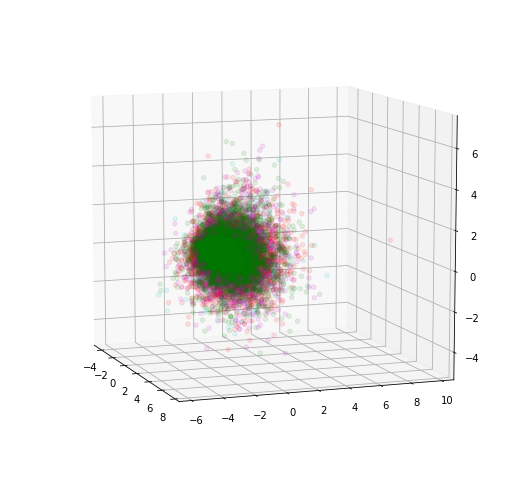

In [11]:
"""
Let's plot our data to see if some clusters appear
"""
import pandas as pd
from sklearn.decomposition import PCA
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Plot colours
colors = ['b', 'g', 'r', 'c', 'm', 'y']

with open("lists/title/labels.txt", "rb") as labels:
    y = np.array(pickle.load(labels)[0:20000])
    pca = PCA(n_components=3)
    vectors = model.docvecs.doctag_syn0[0:20000]
    transform = pd.DataFrame(pca.fit(vectors).transform(vectors))
    
    # Plotting it after categorizing it
    fig = plt.figure(figsize=(9, 8.5))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(1, 5):
        ax.scatter(transform[y == i][0], transform[y == i][1], transform[y == i][2], alpha=0.1, color=colors[i])
    for ii in range(0,360,20):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("dessins_doc2vec/movie_%d.png" % ii)
    
plt.show()